In [1]:
# !wget https://github.com/SVizor42/ML_Zoomcamp/releases/download/bee-wasp-data/data.zip
# !unzip data.zip

In [2]:
#@ IMPORTING LIBRARIES:
import os
import shutil

import numpy as np
import matplotlib.pyplot as plt

from tensorflow import keras

from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import optimizers

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image

2023-11-19 17:30:12.962739: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-19 17:30:12.962781: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-19 17:30:12.962804: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-19 17:30:12.968407: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
#@ INSPECTION:
import tensorflow
tensorflow.__version__

'2.14.1'

### Data Preparation

The dataset contains around 2500 images of bees and around 2100 images of wasps. 

The dataset contains separate folders for training and test sets. 

In [4]:
#@ INITIALIZING PATH TO DATASET:
train_dir = './data/train'
test_dir = './data/test'

### Model

For this homework we will use Convolutional Neural Network (CNN). Like in the lectures, we'll use Keras.

You need to develop the model with following structure:

* The shape for input should be `(150, 150, 3)`
* Next, create a convolutional layer ([`Conv2D`](https://keras.io/api/layers/convolution_layers/convolution2d/)):
    * Use 32 filters
    * Kernel size should be `(3, 3)` (that's the size of the filter)
    * Use `'relu'` as activation 
* Reduce the size of the feature map with max pooling ([`MaxPooling2D`](https://keras.io/api/layers/pooling_layers/max_pooling2d/))
    * Set the pooling size to `(2, 2)`
* Turn the multi-dimensional result into vectors using a [`Flatten`](https://keras.io/api/layers/reshaping_layers/flatten/) layer
* Next, add a `Dense` layer with 64 neurons and `'relu'` activation
* Finally, create the `Dense` layer with 1 neuron - this will be the output
    * The output layer should have an activation - use the appropriate activation for the binary classification case

As optimizer use [`SGD`](https://keras.io/api/optimizers/sgd/) with the following parameters:

* `SGD(lr=0.002, momentum=0.8)`

For clarification about kernel size and max pooling, check [Office Hours](https://www.youtube.com/watch?v=1WRgdBTUaAc).

In [5]:
#@ INITIALIZING MODEL CREATION:
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

2023-11-19 17:30:14.299162: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-11-19 17:30:14.303196: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-11-19 17:30:14.303540: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

In [6]:
optimizer=optimizers.SGD(learning_rate=0.002, momentum=0.8)

### Question 1

Since we have a binary classification problem, what is the best loss function for us?

* `mean squared error`
* `binary crossentropy`
* `categorical crossentropy`
* `cosine similarity`

> **Note:** since we specify an activation for the output layer, we don't need to set `from_logits=True`

In [7]:
loss='binary_crossentropy'

In [8]:
#@ COMPILING THE MODEL: 
model.compile(loss=loss,
             optimizer=optimizer,
             metrics=['acc'])

Answer from Question1 => binary_crossentropy

### Question 2

What's the number of parameters in the convolutional layer of our model? You can use the `summary` method for that. 

* 1 
* 65
* 896
* 11214912

In [9]:
#@ SUMMARY:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 175232)            0         
                                                                 
 dense (Dense)               (None, 64)                11214912  
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 11215873 (42.79 MB)
Trainable params: 11215873 (42.79 MB)
Non-trainable params: 0 (0.00 Byte)
______________

Answer for Question2 => 11215873

### Generators and Training

For the next two questions, use the following data generator for both train and test sets:

```python
ImageDataGenerator(rescale=1./255)
```

* We don't need to do any additional pre-processing for the images.
* When reading the data from train/test directories, check the `class_mode` parameter. Which value should it be for a binary classification problem?
* Use `batch_size=20`
* Use `shuffle=True` for both training and test sets. 

For training use `.fit()` with the following params:

```python
model.fit(
    train_generator,
    epochs=10,
    validation_data=test_generator
)
```

In [10]:
#@ Initialize image datagenerator
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen =ImageDataGenerator(rescale=1./255)

In [11]:
#@ TRAINING DATAGENERATOR:
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    shuffle=True,
                                                    target_size=(150, 150),
                                                    batch_size=20,
                                                    class_mode='binary')

Found 3677 images belonging to 2 classes.


In [12]:
#@ VALIDATION DATAGENERATOR:
test_generator = test_datagen.flow_from_directory(test_dir,
                                                shuffle=True,
                                                target_size=(150, 150),
                                                batch_size=20,
                                                class_mode='binary')

Found 918 images belonging to 2 classes.


In [13]:
#@ INSPECTING:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


In [14]:
#@ TRAINING THE MODEL:
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=test_generator
)

Epoch 1/10


2023-11-19 17:30:15.183566: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:442] Loaded cuDNN version 8700
2023-11-19 17:30:15.997293: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7fb90130e2b0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-11-19 17:30:15.997344: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce GTX 1660 Ti, Compute Capability 7.5
2023-11-19 17:30:16.070368: I ./tensorflow/compiler/jit/device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


184/184 [==============================] - 7s 31ms/step - loss: 0.6814 - acc: 0.5502 - val_loss: 0.6465 - val_acc: 0.6209
Epoch 2/10
184/184 [==============================] - 6s 30ms/step - loss: 0.6492 - acc: 0.6032 - val_loss: 0.6263 - val_acc: 0.5719
Epoch 3/10
184/184 [==============================] - 5s 26ms/step - loss: 0.6012 - acc: 0.6704 - val_loss: 0.5725 - val_acc: 0.7179
Epoch 4/10
184/184 [==============================] - 4s 22ms/step - loss: 0.5561 - acc: 0.7180 - val_loss: 0.6125 - val_acc: 0.6155
Epoch 5/10
184/184 [==============================] - 5s 26ms/step - loss: 0.5236 - acc: 0.7403 - val_loss: 0.5578 - val_acc: 0.7081
Epoch 6/10
184/184 [==============================] - 5s 26ms/step - loss: 0.5049 - acc: 0.7716 - val_loss: 0.5205 - val_acc: 0.7647
Epoch 7/10
184/184 [==============================] - 5s 25ms/step - loss: 0.4793 - acc: 0.7832 - val_loss: 0.5200 - val_acc: 0.7549
Epoch 8/10
184/184 [==============================] - 6s 34ms/step - loss: 0.458

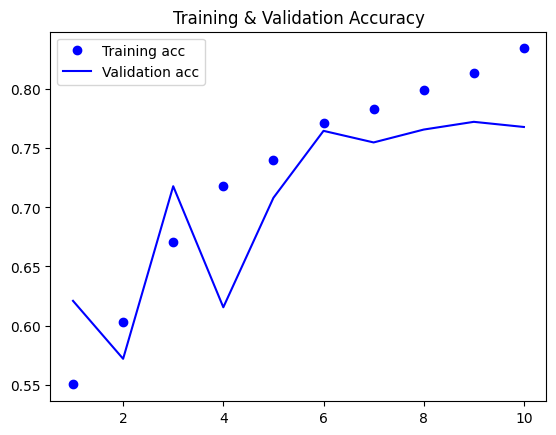

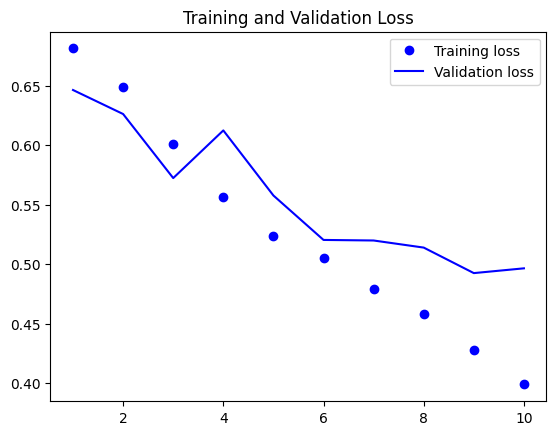

In [15]:
#@ PLOTTING LOSS AND ACCURACY:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label="Training acc")
plt.plot(epochs, val_acc, 'b', label="Validation acc")
plt.title('Training & Validation Accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()

### Question 3

What is the median of training accuracy for all the epochs for this model?

* 0.20
* 0.40
* 0.60
* 0.80

In [16]:
#@ MEDIAN OF ACCURACY:
acc_median = np.median(acc)
acc_median

0.7559151649475098

Answer for Question3 => 0.755 ~ 0.80

### Question 4

What is the standard deviation of training loss for all the epochs for this model?

* 0.031
* 0.061
* 0.091
* 0.131

In [17]:
#@ STANDARD DEVIATION OF LOSS:
loss_std = np.std(loss)
loss_std

0.08879150434270132

Answer for Question4 => 0.088

### Data Augmentation

For the next two questions, we'll generate more data using data augmentations. 

Add the following augmentations to your training data generator:

* `rotation_range=50,`
* `width_shift_range=0.1,`
* `height_shift_range=0.1,`
* `zoom_range=0.1,`
* `horizontal_flip=True,`
* `fill_mode='nearest'`

In [18]:
#@ INITIALIZING DATA AUGMENTATION:
datagen = ImageDataGenerator(
    rotation_range=50,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest')

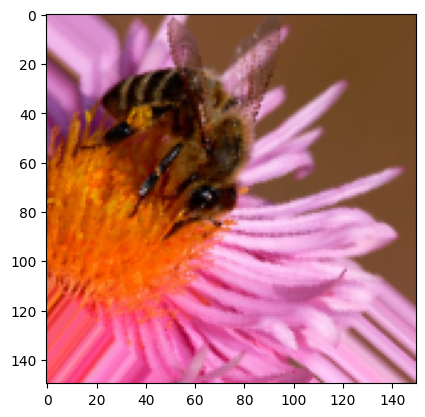

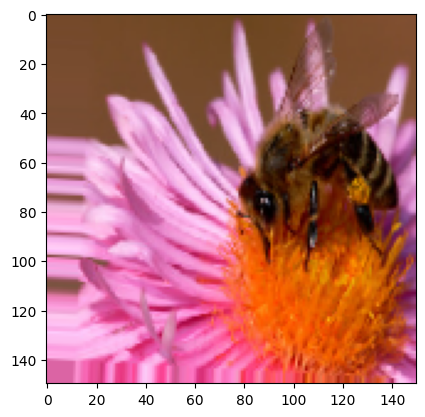

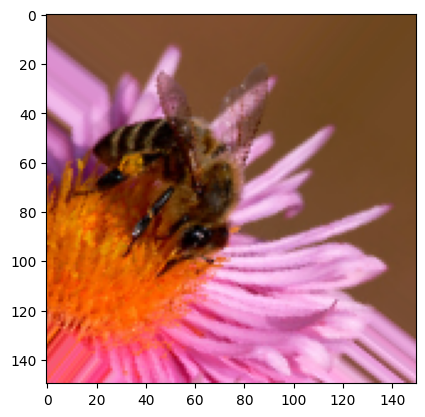

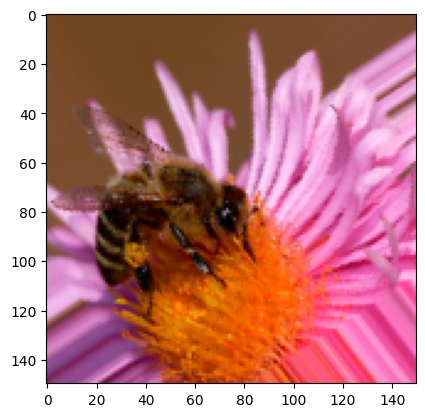

In [19]:
#@ INSPECTION:
fnames = [os.path.join(train_dir+"/bee", fname) for
    fname in os.listdir(train_dir+"/bee")]

img_path = fnames[0]

img = image.load_img(img_path, target_size=(150, 150))

x = image.img_to_array(img)

x = x.reshape((1,) + x.shape)

i=0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break
plt.show()

### Question 5 

Let's train our model for 10 more epochs using the same code as previously.
> **Note:** make sure you don't re-create the model - we want to continue training the model
we already started training.

What is the mean of test loss for all the epochs for the model trained with augmentations?

* 0.18
* 0.48
* 0.78
* 0.108


In [20]:
#@ TRAINING DATA GENERATOR:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=50,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest')


#@ TEST DATA GENERATOR:
test_datagen = ImageDataGenerator(rescale=1./255)

In [21]:
#@ INITIALIZING DATA GENERATOR:
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(150, 150), 
                                                    batch_size=32, 
                                                    class_mode='binary')

Found 3677 images belonging to 2 classes.


In [22]:
#@ INITIALIZING DATA GENERATOR:
validation_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary')

Found 918 images belonging to 2 classes.


In [23]:
#@ MODEL TRAINING WITH AUGMENTATION:
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator)

Epoch 1/10
115/115 [==============================] - 16s 139ms/step - loss: 0.4911 - acc: 0.7677 - val_loss: 0.5283 - val_acc: 0.7484
Epoch 2/10
115/115 [==============================] - 17s 146ms/step - loss: 0.4801 - acc: 0.7726 - val_loss: 0.5019 - val_acc: 0.7712
Epoch 3/10
115/115 [==============================] - 16s 136ms/step - loss: 0.4842 - acc: 0.7702 - val_loss: 0.4867 - val_acc: 0.7745
Epoch 4/10
115/115 [==============================] - 16s 139ms/step - loss: 0.4691 - acc: 0.7876 - val_loss: 0.5442 - val_acc: 0.7364
Epoch 5/10
115/115 [==============================] - 17s 146ms/step - loss: 0.4788 - acc: 0.7868 - val_loss: 0.4791 - val_acc: 0.7723
Epoch 6/10
115/115 [==============================] - 16s 140ms/step - loss: 0.4630 - acc: 0.7822 - val_loss: 0.4818 - val_acc: 0.7702
Epoch 7/10
115/115 [==============================] - 15s 131ms/step - loss: 0.4628 - acc: 0.7917 - val_loss: 0.4581 - val_acc: 0.7876
Epoch 8/10
115/115 [==============================] - 1

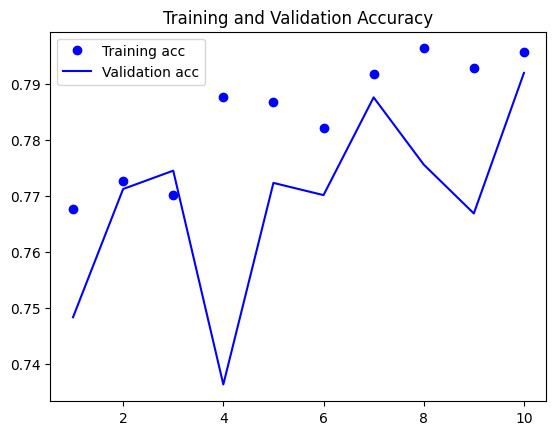

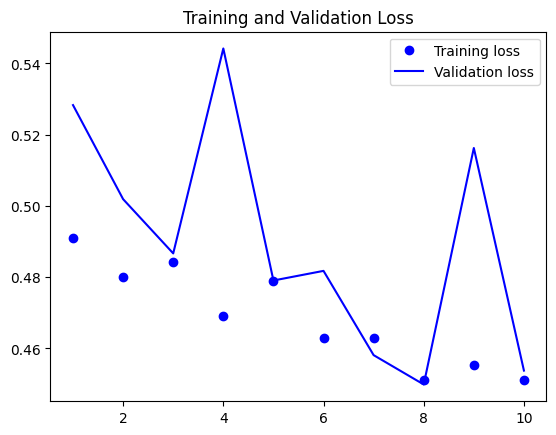

In [24]:
#@ INSPECTION ACCURACY AND LOSS:
acc_aug = history.history['acc']
val_acc_aug = history.history['val_acc']
loss_aug = history.history['loss']
val_loss_aug = history.history['val_loss']

epochs_aug = range(1, len(acc) + 1)

plt.plot(epochs_aug, acc_aug, 'bo', label='Training acc')
plt.plot(epochs_aug, val_acc_aug, 'b', label='Validation acc')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.figure()

plt.plot(epochs_aug, loss_aug, 'bo', label='Training loss')
plt.plot(epochs_aug, val_loss_aug, 'b', label='Validation loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()

In [25]:
#@ MEAN OF VALIDATION LOSS:
loss_mean_aug = np.mean(val_loss_aug)
loss_mean_aug

0.48999844789505004

Answer for Question5 => 0.48

### Question 6

What's the average of test accuracy for the last 5 epochs (from 6 to 10)
for the model trained with augmentations?

* 0.38
* 0.58
* 0.78
* 0.98

In [26]:
#@ INSPECTION:
val_acc_aug[6:10]

[0.7875816822052002,
 0.7755991220474243,
 0.7668845057487488,
 0.7919390201568604]

In [27]:
#@ MEAN OF ACCURACY:
acc_mean_aug = np.mean(val_acc_aug[6:10])
acc_mean_aug

0.7805010825395584

Answer for Question6 => 0.78